In this notebook we define the domains using STAGATE

In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import warnings
warnings.filterwarnings("ignore")
import STAGATE

In [4]:
saving_path=r'../../data/processed_adata/'
adata=sc.read('../../data/processed_adata/adata_multisection_nuclei_r1_with_annotations.h5ad')
adata=adata[adata.obs['replicate']=='1']
adata.X=adata.layers['raw']
adata.obsm['spatial']=np.array(adata.obs.loc[:,['x_centroid','y_centroid']])

## ROI 1

In [6]:

adata2=adata[(adata.obs['x_centroid']<5000)&(adata.obs['x_centroid']>2000)&(adata.obs['y_centroid']>4000)]
plt.scatter(adata.obs.loc[:,'x_centroid'],adata.obs.loc[:,'y_centroid'],s=0.1)
plt.scatter(adata2.obs.loc[:,'x_centroid'],adata2.obs.loc[:,'y_centroid'],s=0.1)
adata=adata2
ndoms=[]
for num in range(1,5):
    ndoms.append(len(np.unique(adata.obs['region_level'+str(num)])))

------Calculating spatial graph...
The graph contains 18304 edges, 24385 cells.
0.7506 neighbors per cell on average.
Size of Input:  (24385, 154)
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


2023-11-07 08:47:56.085815: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2023-11-07 08:47:56.112717: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2500000000 Hz
2023-11-07 08:47:56.115398: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x6657d50 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-11-07 08:47:56.115442: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2023-11-07 08:47:56.120197: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2023-11-07 08:47:56.188473: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-11-07 08:47:56.188495: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:1

6


R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.0.0
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%


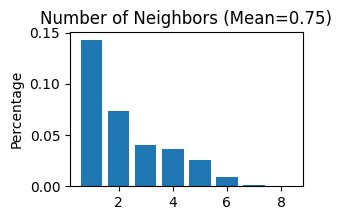

9
fitting ...
  |======================================================================| 100%


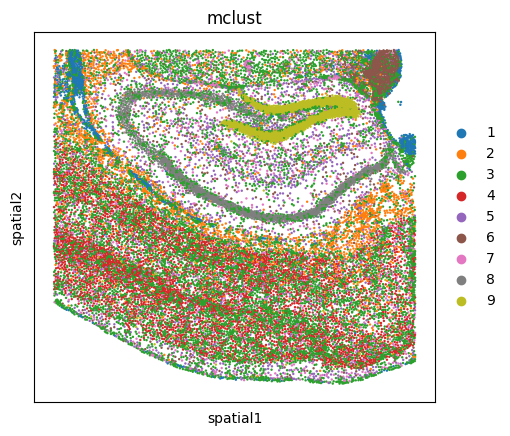

17
fitting ...
  |======================================================================| 100%


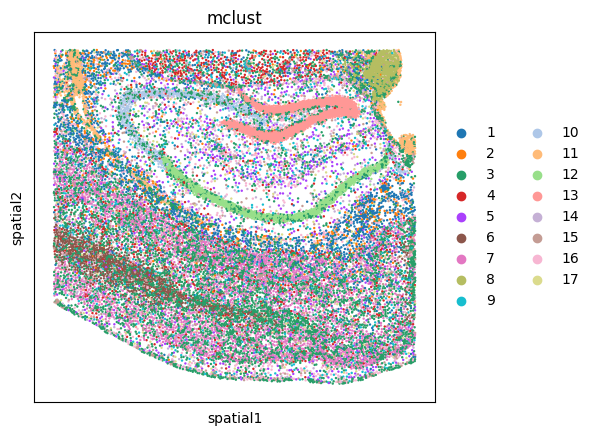

49
fitting ...
  |======================================================================| 100%


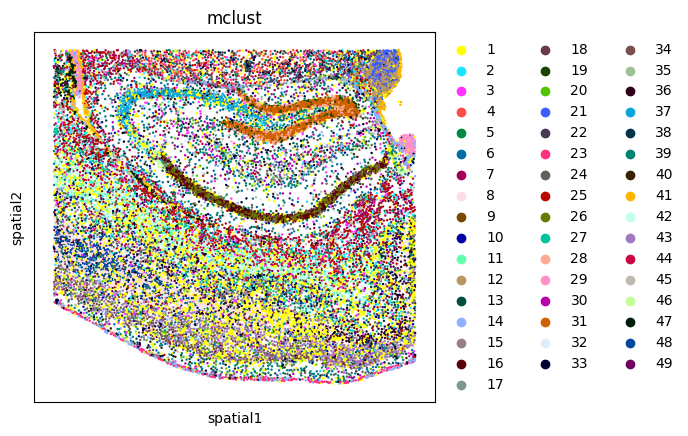

------Calculating spatial graph...
The graph contains 131492 edges, 24385 cells.
5.3923 neighbors per cell on average.
Size of Input:  (24385, 154)


100%|█████████████████████████████████████████████████████████████████████████████████| 500/500 [04:55<00:00,  1.69it/s]


6
fitting ...
  |======================================================================| 100%


9
fitting ...
  |======================================================================| 100%


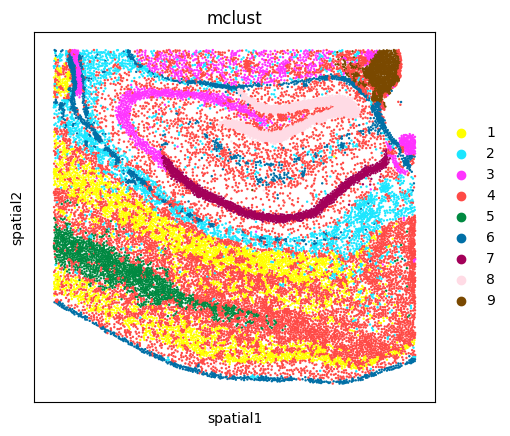

17
fitting ...
  |======================================================================| 100%


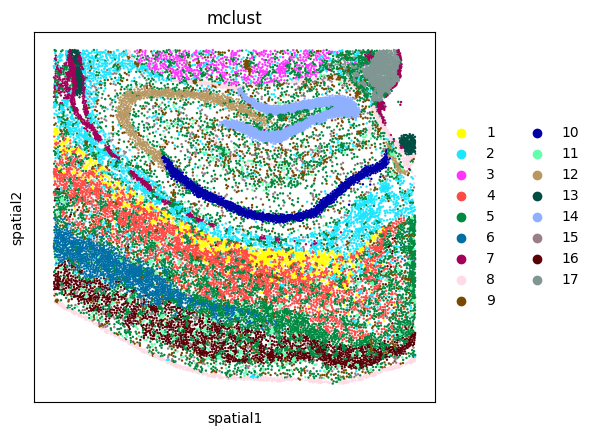

49
fitting ...
  |======================================================================| 100%


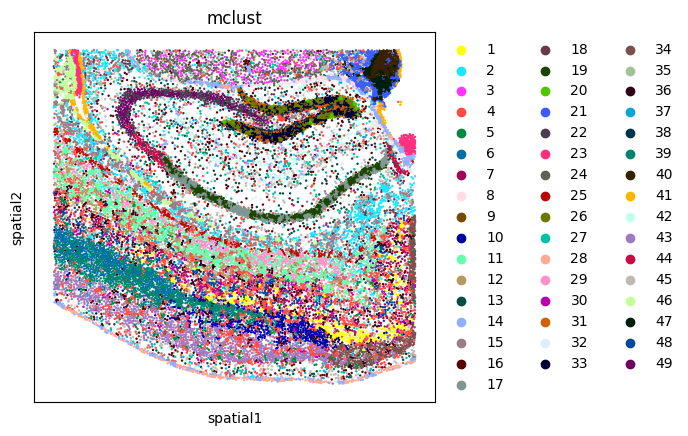

------Calculating spatial graph...
The graph contains 306766 edges, 24385 cells.
12.5801 neighbors per cell on average.
Size of Input:  (24385, 154)


100%|█████████████████████████████████████████████████████████████████████████████████| 500/500 [07:17<00:00,  1.14it/s]


6
fitting ...
  |======================================================================| 100%


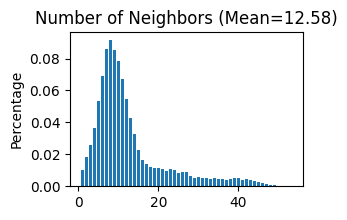

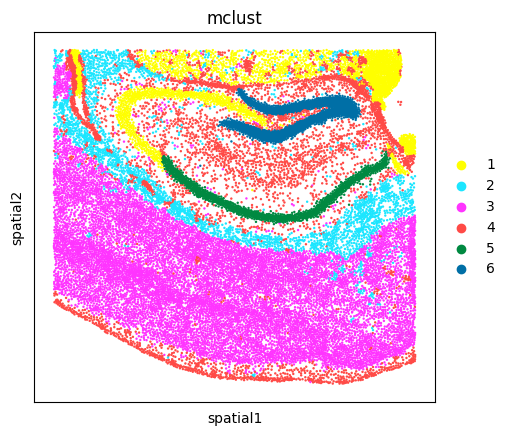

9
fitting ...
  |======================================================================| 100%


17
fitting ...
  |======================================================================| 100%


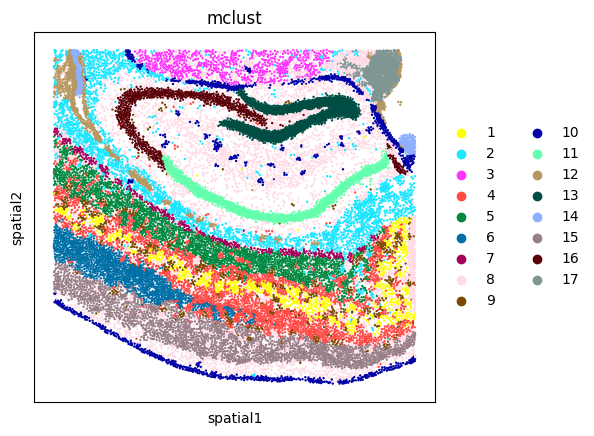

49
fitting ...
  |======================================================================| 100%


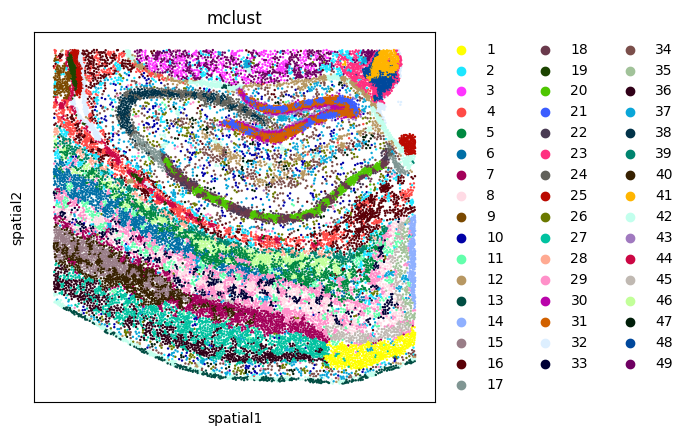

------Calculating spatial graph...
The graph contains 536092 edges, 24385 cells.
21.9845 neighbors per cell on average.
Size of Input:  (24385, 154)


100%|█████████████████████████████████████████████████████████████████████████████████| 500/500 [09:47<00:00,  1.17s/it]


6
fitting ...
  |======================================================================| 100%


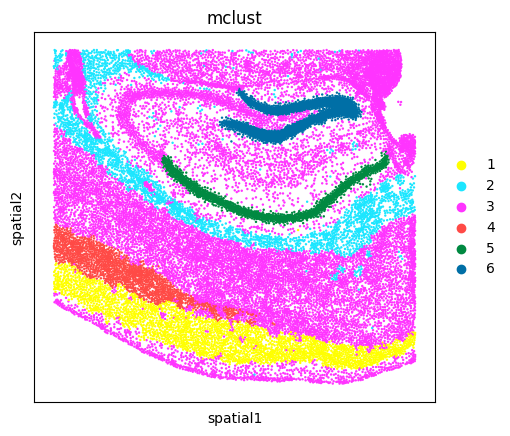

9
fitting ...
  |======================================================================| 100%


17
fitting ...
  |======================================================================| 100%


49
fitting ...
  |======================================================================| 100%


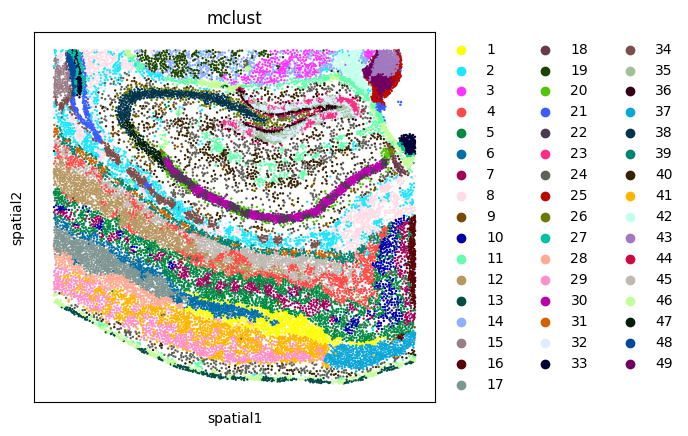

------Calculating spatial graph...
The graph contains 818116 edges, 24385 cells.
33.5500 neighbors per cell on average.
Size of Input:  (24385, 154)


100%|█████████████████████████████████████████████████████████████████████████████████| 500/500 [13:13<00:00,  1.59s/it]


6
fitting ...
  |======================================================================| 100%


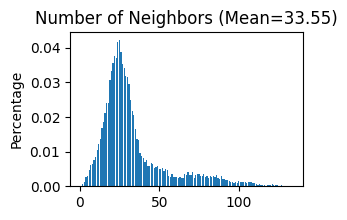

9
fitting ...
  |======================================================================| 100%


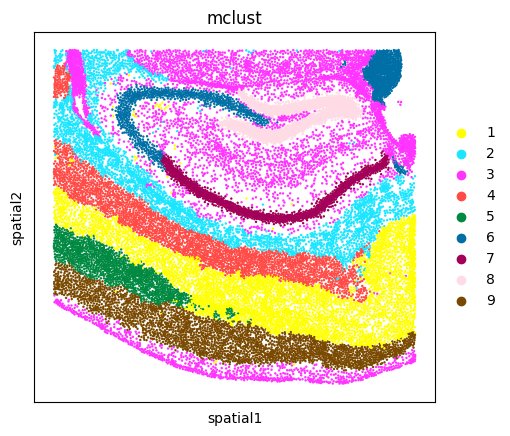

17
fitting ...
  |======================================================================| 100%


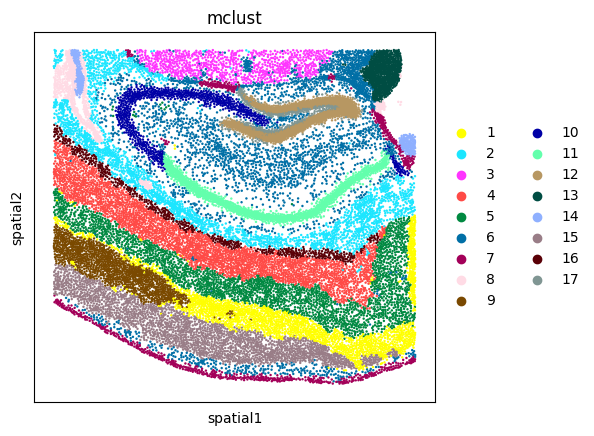

49
fitting ...
  |======================================================================| 100%


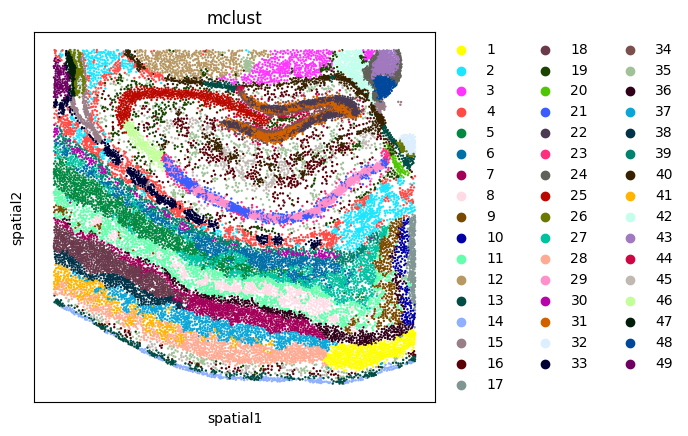

In [8]:
adata_orig=adata.copy()
for rc in [10,20,30,40,50]:
    STAGATE.Cal_Spatial_Net(adata_orig, rad_cutoff=rc)
    STAGATE.Stats_Spatial_Net(adata_orig)
    adata = STAGATE.train_STAGATE(adata_orig, alpha=0)
    sc.pp.neighbors(adata, use_rep='STAGATE')
    sc.tl.umap(adata)
   # nclusts=[6,11,24,83,155]
    for n in ndoms:
        try:
            if not os.path.exists('../../figures/7.spatial_architecture/domains_predicted/ROI1/'+str(n)+'/predicted_STAGATE_rad_cutoff'+str(rc)+'.csv'):
                print(n)
                adata = STAGATE.mclust_R(adata, used_obsm='STAGATE', num_cluster=n)
                adata.obs['clusters_'+str(n)]=adata.obs['mclust']
                sc.pl.spatial(adata,color='mclust',spot_size=20)
                plt.show()
                adata.obs.to_csv('../../figures/7.spatial_architecture/domains_predicted/ROI1/'+str(n)+'/predicted_STAGATE_rad_cutoff'+str(rc)+'.csv')
        except:
            print('Error arose')